In [74]:
# our predictive model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('le_machine_learningz.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
asArray = np.asarray(result)
np.savetxt("results.csv", asArray, delimiter=",")

In [75]:
# testing accuracy of our predictive model

data = pd.read_csv('results.csv')
data.head()

,5.454779627799987793e+05,5.900000000000000000e+05
0,480598.460224,418000.0
1,461119.683918,492000.0
2,596959.666126,579000.0
3,622755.251564,640000.0
4,287639.225216,256000.0


In [30]:
# mean squared error

from sklearn.metrics import mean_squared_error
mean_squared_error(data.iloc[:,1], data.iloc[:,0])

3188325900.2323127

In [31]:
# root mean squared error
from math import *
print(sqrt(mean_squared_error(data.iloc[:,1], data.iloc[:,0])))

56465.26277484514


In [32]:
# mean absolute error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(data.iloc[:,1], data.iloc[:,0])

43026.29901712134

In [70]:
# mean absolute percentage error

import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(str(round((mean_absolute_percentage_error(data.iloc[:,1], data.iloc[:,0])),2)) + '%')

10.43%


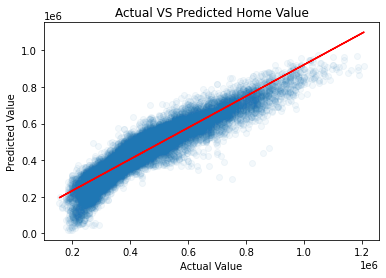

In [66]:
# Actual VS Predicted

plt.scatter(data.iloc[:,1], data.iloc[:,0], alpha=0.05)
plt.title('Actual VS Predicted Home Value')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

m, b = np.polyfit(data.iloc[:,1], data.iloc[:,0], 1)
plt.plot(data.iloc[:,1], m*data.iloc[:,1] + b, color = 'r')

plt.show()